<a href="https://colab.research.google.com/github/vmorozov/colab/blob/main/example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Private GitHub Setup
1. Create a personal access token (classic) with the **repo** scope at https://github.com/settings/tokens.
2. Keep the token secret—do not share it or commit it to source control.
3. When prompted below, enter your GitHub username and paste the token; the notebook stores it only for this session.
4. If you prefer, set the variables ahead of time with `%env GITHUB_USERNAME=<user>` and `%env GITHUB_TOKEN=<token>`.
5. Similarly you can `%env PROJECT_NAME=<your github project>`

In [5]:
!gh repo clone vmorozov/colab

Cloning into 'colab'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 15 (delta 2), reused 11 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (15/15), 107.25 KiB | 26.81 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [6]:
ls

colab/  sample_data/


In [4]:

import getpass
import os

if "GITHUB_USERNAME" not in os.environ or not os.environ["GITHUB_USERNAME"].strip():
    os.environ["GITHUB_USERNAME"] = input("Enter your GitHub username: ").strip()

if "GITHUB_TOKEN" not in os.environ or not os.environ["GITHUB_TOKEN"].strip():
    os.environ["GITHUB_TOKEN"] = getpass.getpass("Enter your GitHub personal access token: ").strip()

if not os.environ["GITHUB_TOKEN"]:
    raise RuntimeError("GITHUB_TOKEN is required to clone the private repository.")

Enter your GitHub username: vmorozov
Enter your GitHub personal access token: ··········


In [7]:
from colab.setup import (
    change_directory,
    clone_or_update_repo,
    ensure_project_name,
    execute_notebook,
    install_project_requirements,
    store_credentials_from_env,
)

In [8]:
netrc_path = store_credentials_from_env()
print(f"Credentials stored in {netrc_path}")

Credentials stored in /root/.netrc


In [9]:
project_name = ensure_project_name()
project_dir = clone_or_update_repo("vmorozov", project_name)
print(f"Repository ready at {project_dir}")

Enter your project name: kg_predict
Repository ready at /content/kg_predict


In [10]:
current_dir = change_directory(project_dir)
print(f"Working directory set to: {current_dir}")

index_url = install_project_requirements()
print(f"Using PyG wheel index: {index_url}")

Working directory set to: /content/kg_predict
Using PyG wheel index: https://data.pyg.org/whl/torch-2.8.0+cu126.html


In [11]:
#output_path = execute_notebook()
#print(f"Notebook execution complete. Output saved to {output_path}")

In [12]:
ls  -ltrlh

total 352K
-rw-r--r-- 1 root root  308 Oct 30 19:07 README.md
drwxr-xr-x 2 root root 4.0K Oct 30 19:07 data/
-rw-r--r-- 1 root root    0 Oct 30 19:07 eval.ipynb.out
-rw-r--r-- 1 root root 3.5K Oct 30 19:07 eval.ipynb
-rw-r--r-- 1 root root 104K Oct 30 19:07 eval_drug_baseline.png
-rw-r--r-- 1 root root 112K Oct 30 19:07 gnn.png
-rw-r--r-- 1 root root 109K Oct 30 19:07 eval_drug_gnn.png
drwxr-xr-x 3 root root 4.0K Oct 30 19:07 link_predict/
drwxr-xr-x 3 root root 4.0K Oct 30 19:07 tests/
-rw-r--r-- 1 root root  346 Oct 30 19:07 requrment.txt


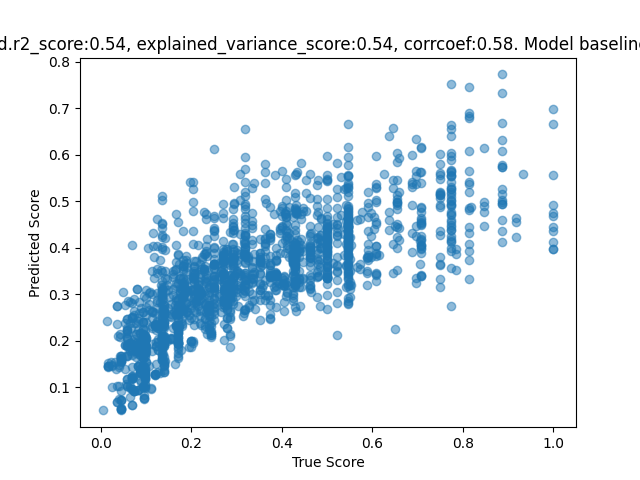

In [ ]:
#show eval_drug_baseline.png
from IPython.display import Image
Image(filename='eval_drug_baseline.png')
#

In [13]:
#convert eval.ipynb to Python script
!jupyter nbconvert --to script eval.ipynb

[NbConvertApp] Converting notebook eval.ipynb to script
[NbConvertApp] Writing 1975 bytes to eval.py


In [ ]:
#pull the last changes from remote github into current directory from command line. overwrite local changes
#!git pull --force --all

Fetching origin
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 3 (delta 2), reused 3 (delta 2), pack-reused 0 (from 0)
Unpacking objects: 100% (3/3), 273 bytes | 273.00 KiB/s, done.
From https://github.com/vmorozov/kg_predict
   df3a7d5..9a514bb  main       -> origin/main
Updating df3a7d5..9a514bb
Fast-forward
 eval.ipynb | 1 +
 1 file changed, 1 insertion(+)
